In [2]:
import numpy as np
import netCDF4 as nc
from scipy import stats
import datetime as dt
import matplotlib.dates as pltd
import matplotlib.pyplot as plt
import csv 

In [3]:
# convert time for SODA SODA3.12.2
def convert_time(time):
    ref = dt.datetime(1980,1,1)
    date_vals = np.zeros(len(time))
    for nt in range(len(time)):
        day_time = ref + dt.timedelta(days=np.float(time[nt]))
        date_vals[nt] = pltd.date2num(day_time)
            
    return date_vals

In [4]:
# convert time for SODA SODA2.2.4
def convert_time2(time):
    ref = dt.datetime(1960,1,1)
    date_vals = np.zeros(len(time))
    for nt in range(len(time)):
        day_time = ref + dt.timedelta(days=30*np.float(time[nt]))
        date_vals[nt] = pltd.date2num(day_time)
            
    return date_vals

In [10]:
ncfil = 'SODA3.12.2_ZonalVelocity_EPac.nc' # SODA3.12.2
fid = nc.Dataset(ncfil)

# Time and spatial variables
time = fid.variables['time'][:].squeeze()
lat = fid.variables['yu_ocean'][:]
lon = fid.variables['xu_ocean'][:]
depth = fid.variables['st_ocean'][:].squeeze()
    
# Get indices for spatial bounds  (2N–2S, 150–90W; depth: 10–300 m)
ilat = np.where((lat>=-2) &(lat<=2))[0]      # 2N–2S
ilon = np.where((lon>=180) & (lon<=270))[0]  # 180–90W
idep = np.where((depth>10) & (depth<300))[0]   # 10–300m
    
# Extract monthly mean velocities for given year and region
u_euc = fid.variables['u'][:,idep[0]:idep[-1]+1,ilat[0]:ilat[-1]+1,ilon[0]:ilon[-1]+1].squeeze()
    
# Extract max zonal velocity values to the stored velocity time series
maxu_euc = np.max(u_euc,axis=(1,2,3))

# Regression with "m/s per month" slope
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(len(maxu_euc)),maxu_euc)

# multiplied by 12 months and 100 years for slope in "m/s per century"
print('slope =', slope*12*100, 'cm/century')
print('p =',p_value)

# field names 
fields = ['year', 'month', 'max zonal velocity (m/s)'] 
# name of csv file 
filename = "EUC_maximum_zonal_velocity_SODA3.12.2.csv"
    
# writing to csv file
nrow = 0
with open(filename, 'w') as csvfile: 
    # creating a csv dict writer object 
    writer = csv.DictWriter(csvfile, delimiter=' ', fieldnames = fields) 
    
    # writing headers (field names) 
    writer.writeheader() 
    for year in range(1981,2016+1):
        for month in range(1,12+1):
            writer.writerow({'year': year,'month': str(month).zfill(2),'max zonal velocity (m/s)':maxu_euc[nrow]})
            nrow+=1

slope = 0.41660561669583557 cm/century
p = 1.6966752746879308e-05


/net3/e1n/anaconda3/envs/mom6/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


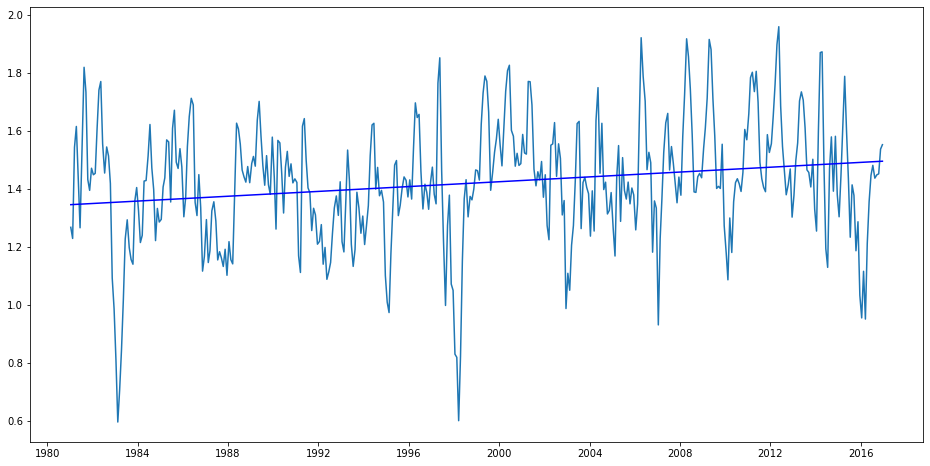

In [11]:
# Plotting Figure
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)

# Convert time to datenumber
plt_time = convert_time(time)

# Regression against datetime values for plotting
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(plt_time,maxu_euc)

# plot monthly time series
ax.plot(plt_time,maxu_euc)

# plot regression line
ax.plot(plt_time,(slope2*plt_time+intercept2),color='blue')

# make x-axis show the date
ax.xaxis_date()

In [15]:
ncfil = 'SODA2.2.4_ZonalVelocity_EPac.nc'  # SODA2.2.4
fid = nc.Dataset(ncfil)

# Time and spatial variables
time = fid.variables['time'][:]
lat = fid.variables['lat'][:]
lon = fid.variables['lon'][:]
depth = fid.variables['depth'][:]

# Get indices for spatial bounds  (2N–2S, 150–90W; depth: 10–300 m)
ilat = np.where((lat>=-2) &(lat<=2))[0]       # 2N–2S
ilon = np.where((lon>=-150) & (lon<=-90))[0]  # 150–90W
idep = np.where((depth>10) & (depth<300))[0]    # 10–300m

# Extract monthly mean velocities for given year and region
u = fid.variables['u'][:,idep[0]:idep[-1]+1,ilat[0]:ilat[-1]+1,ilon[0]:ilon[-1]+1]

# Extract max zonal velocity values to the stored velocity time series
maxu_euc = np.max(u,axis=(1,2,3))

# For statistics with month number
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(np.arange(len(maxu_euc)),maxu_euc)
print('slope =', slope2*12*100, 'cm/century')
print('p =',p_value2)

# field names 
fields = ['year', 'month', 'max zonal velocity (m/s)'] 

# name of csv file 
filename = "EUC_maximum_zonal_velocity_SODA2.2.4.csv"
    
# writing to csv file
nrow = 0
with open(filename, 'w') as csvfile: 
    # creating a csv dict writer object 
    writer = csv.DictWriter(csvfile, delimiter=' ', fieldnames = fields) 
    
    # writing headers (field names) 
    writer.writeheader() 
    for year in range(1871,2008+1):
        for month in range(1,12+1):
            writer.writerow({'year': year,'month': str(month).zfill(2),'max zonal velocity (m/s)':maxu_euc[nrow]})
            nrow+=1


slope = 0.1688996793874071 cm/century
p = 4.004595017026357e-32


/net3/e1n/anaconda3/envs/mom6/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


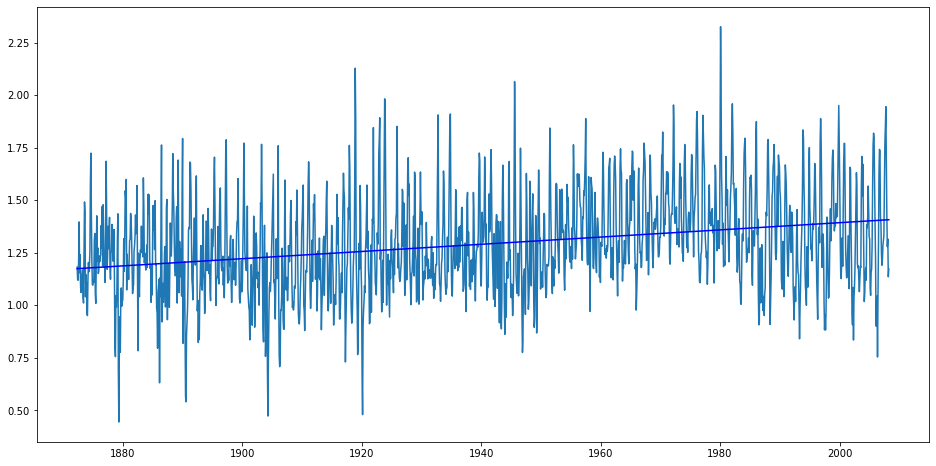

In [7]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)

# For plotting with datetime
plt_time = convert_time2(time)
slope, intercept, r_value, p_value, std_err = stats.linregress(plt_time,maxu_euc)

# plot monthly time series
ax.plot(plt_time,maxu_euc)

# plot regression line
ax.plot(plt_time,(slope*plt_time+intercept),color='blue')

# make x-axis show the date
ax.xaxis_date()